# Problem Statement - Create a word2vec/CBOW model, train the model on the given dataset and create your own embeddingdictionary with key as the token and embedding as the value. 
a. Visualize the embeddings using the below mentioned libraries.

b. Show that similar words are close to each other in the visual cluster.

c. Also create a word similarity program that uses your generated embedding dictionary and based
on the input words from the user, the word similarity is calculated.



## This Notebook is laid out as follows:

### **1. Loading Dataset**
### **2. Text PreProcessing**
### **3. WordClouds**
### **4. Creating Our Custom Word Embedding**
### **5. Word Similarity**

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import os
import re

from gensim.models import Word2Vec
from tqdm import tqdm

tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Loading Dataset

In [2]:
f = open('../input/wikitext2/wiki.train.tokens', "rt")
text = f.readlines()

## Data Preprocessing

In [3]:
def convertToList(text):
    res = []
    for i in range(0,len(text)):

        lis = list(text[i].split(' '))
        res.append(lis)
    return res

text = convertToList(text)

In [4]:
text[1]

['', '=', 'Valkyria', 'Chronicles', 'III', '=', '\n']

In [5]:
def preprocessing(text):
    
    
    processed_text = []
    
    for tokens in tqdm(text):
        
        # remove other non-alphabets symbols with space (i.e. keep only alphabets and whitespaces).
        processed = re.sub('[^a-zA-Z ]', '', tokens)
        
        words = processed.split()
        
        # keep words that have length of more than 1 (e.g. gb, bb), remove those with length 1.
        processed_text.append(' '.join([word for word in words if len(word) > 1]))
    
    return processed_text

## WordClouds

In [6]:
text_string=''

for i in text:
    for j in i:
        text_string += j

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

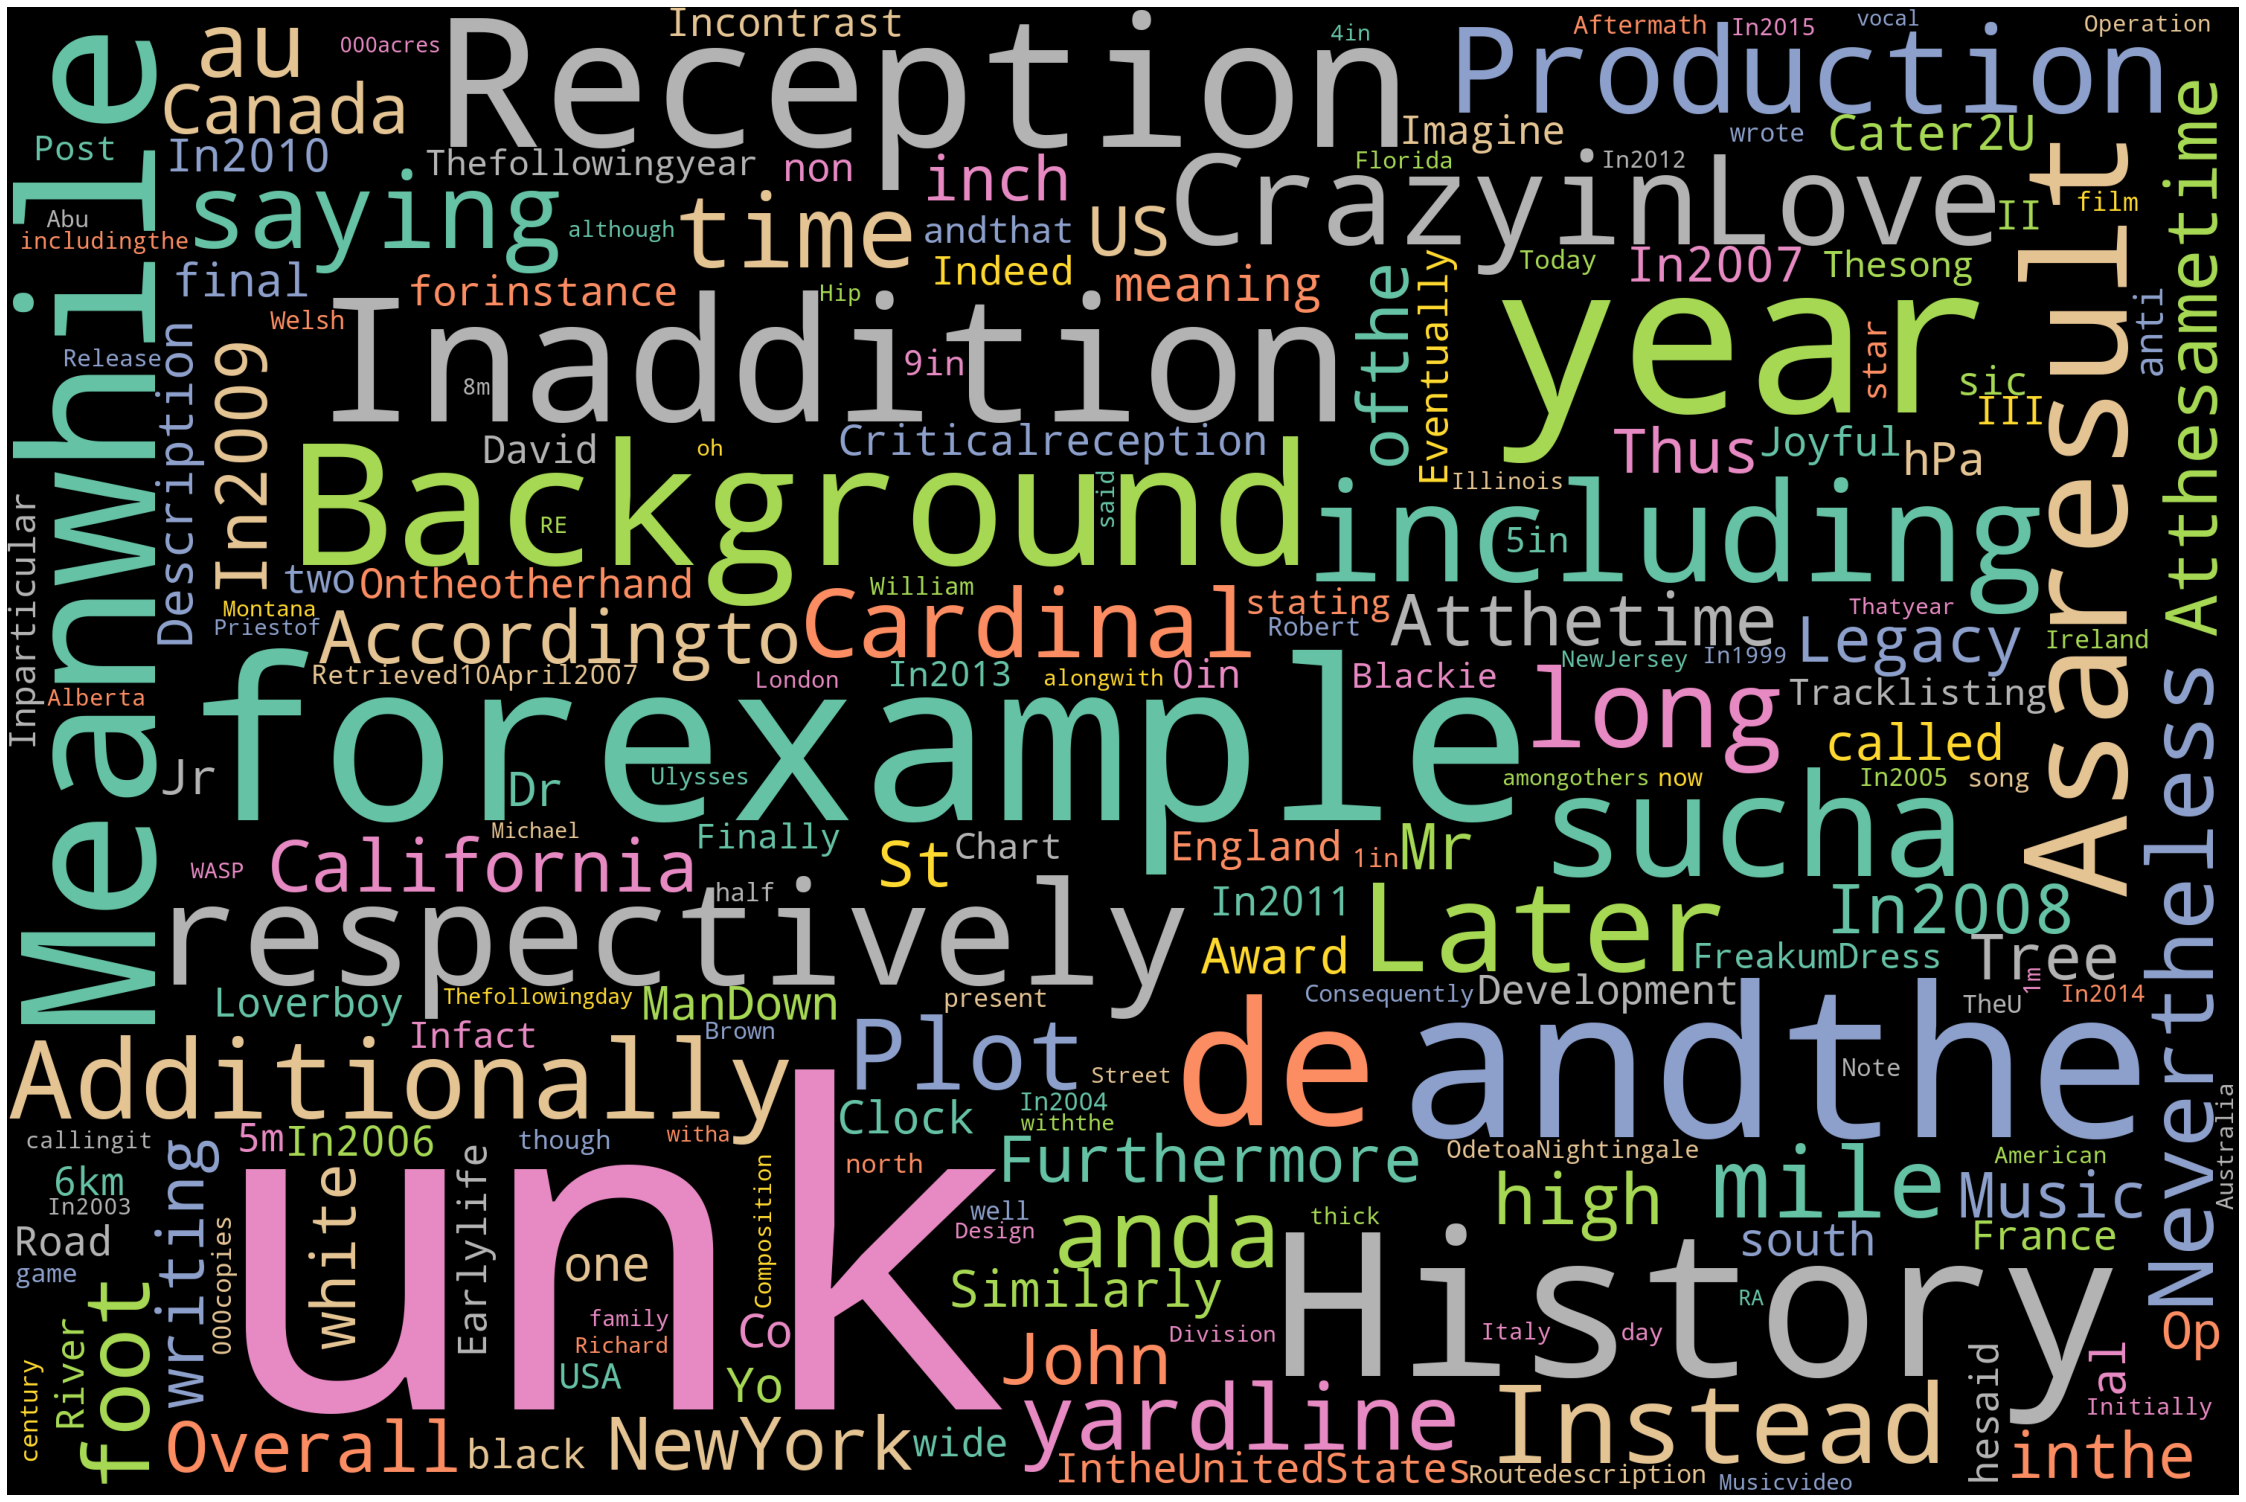

In [8]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text_string)
plot_cloud(wordcloud)


## Saving Our WordCloud

In [9]:
wordcloud.to_file("wordcloud.png")

## Creating Our Custom word embedding

In [10]:

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=4-1)

In [11]:
w2v_model.build_vocab(text, progress_per=10000)


In [12]:
# Total number of vocab in our custom word embedding

len(w2v_model.wv.vocab.keys())

8836

In [13]:
# Dimension of each word (we set it to 300 in the above training step)

w2v_model.wv.vector_size


300

In [14]:
w2v_model.train(text, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(25307125, 63760380)

In [15]:
# Checking out how 'team' is represented (an array of 300 numbers)

w2v_model.wv.get_vector('team')

array([ 0.26044983, -0.02652979,  1.7775866 ,  0.04734432, -0.9492112 ,
        0.01968621,  0.28095508, -1.5025581 ,  0.28851846, -0.32931   ,
        0.12709357,  0.04711547,  0.16278663,  0.37399453, -0.1018903 ,
        0.645498  , -0.05608749,  0.36596859, -0.23902695, -0.39714137,
       -0.24037184, -0.76915115, -0.05082643, -0.08668167,  0.4328233 ,
       -0.51344305,  0.02145658,  0.4165829 , -0.15722068,  0.32466015,
        0.786981  ,  0.1589701 , -0.03758685, -0.49359283, -0.00664283,
        0.41844156,  0.46288466, -0.76299995, -0.4114937 ,  0.75274414,
        0.3894123 , -1.4719632 , -0.24650529,  0.36136204,  0.22516604,
       -0.49173707, -0.5259251 , -0.2693891 ,  0.29266563,  0.45413658,
        0.7161976 , -0.88506   , -0.37207013,  0.02631728, -0.26081884,
       -0.75705963, -0.05012918, -0.43562797,  0.39672053,  0.65460235,
       -0.55823094, -0.03119522, -0.26606387,  0.44820186, -1.3293556 ,
        0.27753085,  0.04935413,  0.7021522 , -0.62834316,  0.33

## Finding Similar Words

### Visual Cluster

In [16]:
from sklearn.manifold import TSNE
def tsne_plot(model):
    
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


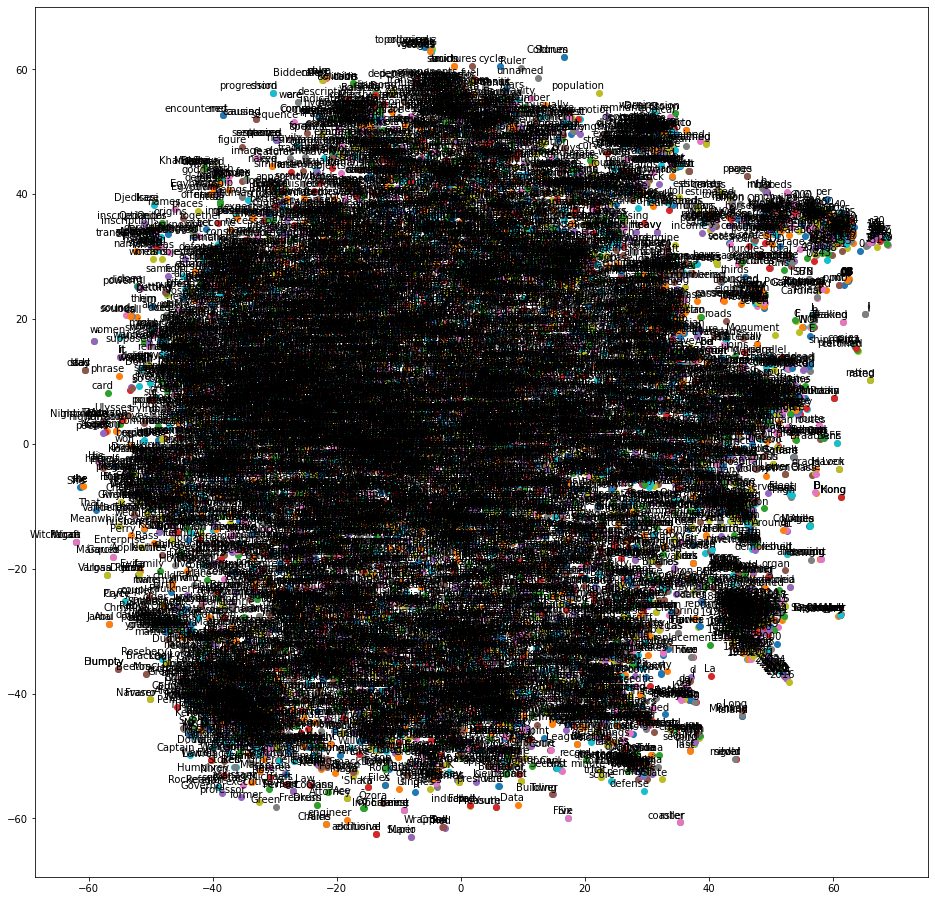

In [17]:
tsne_plot(w2v_model)

In [18]:
def getSimilarWords(word,model):
    print(model.wv.most_similar(word))


In [ ]:
user_input = input('Enter word to find words similar to it \n')
getSimilarWords(user_input,w2v_model)

In [19]:
getSimilarWords('California',w2v_model)

[('Florida', 0.4144067168235779), ('Arizona', 0.4064364433288574), ('Oregon', 0.40596336126327515), ('Portland', 0.39664846658706665), ('Braves', 0.39511269330978394), ('Chicago', 0.3741154670715332), ('Santa', 0.3569989800453186), ('Boston', 0.3494335412979126), ('Ulster', 0.34694457054138184), ('Kansas', 0.34113621711730957)]


In [20]:
getSimilarWords('music',w2v_model)

[('blues', 0.48068884015083313), ('recordings', 0.4604979157447815), ('soundtrack', 0.4588333070278168), ('Madonna', 0.4586237370967865), ('jazz', 0.441499263048172), ('indie', 0.44014501571655273), ('musical', 0.43588021397590637), ('melody', 0.4170234799385071), ('repertoire', 0.4062197208404541), ('musicians', 0.4057728946208954)]


## Savin our custom Word Embedding

In [21]:
from gensim.models import KeyedVectors

In [22]:
w2v_model.wv.save_word2vec_format('custom_wikitext_embedding.txt')